In [ ]:
from infrastructure.classes import Experiment, TrainParameters
from infrastructure.training import train
import torch

experiment = Experiment(
    tensor_parameters=dict(dtype=torch.float64, device=torch.device("cpu")),
    dataset_name="picnn_fnlvqr_banana",
    dataset_number_of_points=10**4,
    dataset_parameters=dict(number_of_features=10, number_of_classes=2),
    dataloader_parameters=dict(batch_size=1024, shuffle=True),
    pushforward_operator_name="neural_quantile_regression",
    pushforward_operator_parameters=dict(
        feature_dimension=1,
        response_dimension=2,
        hidden_dimension=8,
        number_of_hidden_layers=4,
    ),
    train_parameters=TrainParameters(
        number_of_epochs_to_train=10,
        verbose=True,
        optimizer_parameters=dict(lr=0.01),
        scheduler_parameters=dict(eta_min=0)
    )
)

model = train(experiment)
_ = model.eval()

In [2]:
import torch
from pushforward_operators.neural_quantile_regression.neural_quantile_regression import NeuralQuantileRegression
from datasets import FunnelDistribution

tensor_parameters = {}
dataset = FunnelDistribution(tensor_parameters)

model = NeuralQuantileRegression.load_class("../../experiments_full_10_09_2025/funnel_1/neural_quantile_regression_u/weights.pth")
model.eval()

X = dataset.sample_covariates(1000)
U = torch.randn(1000, 1).to(X)
Y = model.push_u_given_x(U, X)

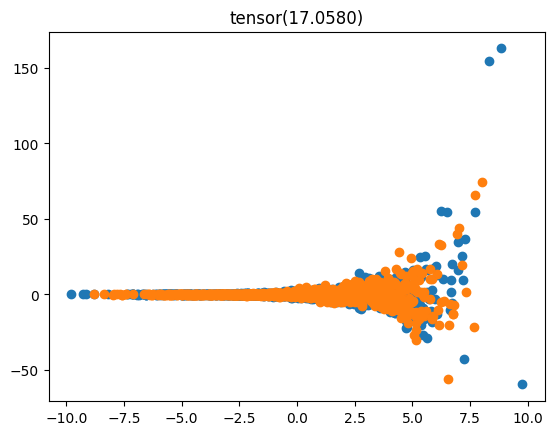

In [ ]:
import matplotlib.pyplot as plt
from metrics import sliced_wasserstein2, wassertein2

X_dataset, Y_dataset = dataset.sample_joint(n_points=1000)

plt.scatter(X_dataset.numpy(force=True), Y_dataset.numpy(force=True))
plt.scatter(X.numpy(force=True), Y.numpy(force=True))
plt.title(wassertein2(Y_dataset, Y))
plt.show()

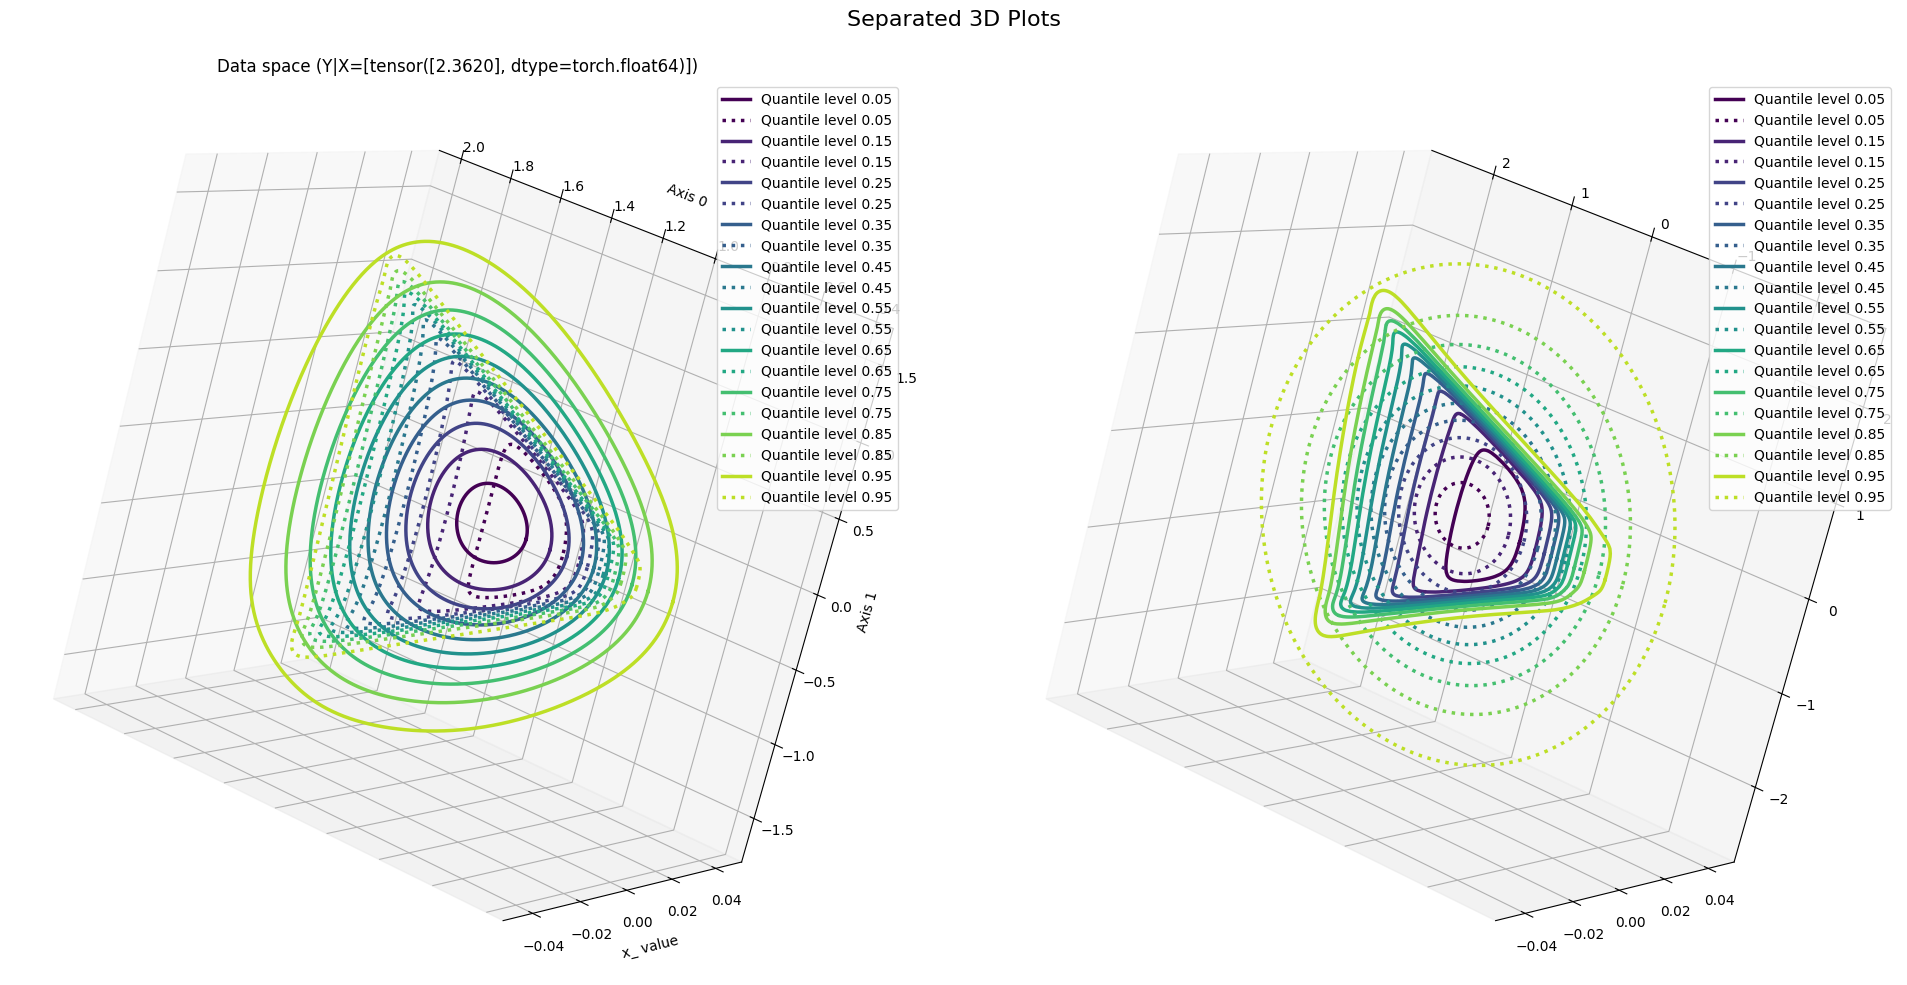

In [ ]:
%matplotlib inline
from datasets import PICNN_FNLVQR_Banana
from utils.plot import plot_quantile_levels_from_dataset
dataset = PICNN_FNLVQR_Banana(tensor_parameters=experiment.tensor_parameters)
plot_quantile_levels_from_dataset(
    model=model,
    dataset=dataset,
    conditional_value=dataset.sample_covariates(1),
    number_of_quantile_levels=10,
    tensor_parameters=experiment.tensor_parameters
)